# Diferencias finitas para la ecuación de Poisson en dim=1

Consideramos la ecuación $∂^2_xu=−u+f(x)$ en el intervalo $(−1,1)$, con condiciones de contorno $u(−1)=u(1)=0$, y donde la función f es $f(x)=exp(−2∗x^2)$
. Escribe un programa que resuelva esta ecuación usando un método de diferencias finitas, y represente el resultado en una gráfica.


https://colab.research.google.com/drive/14Dkp6TgPTWMT_ZvtNH7e68knSOjiFLVG?

### Importación de librerías

In [ ]:
import numpy as np
import scipy as sp
from scipy.sparse import diags
import matplotlib.pyplot as plt

### Método de diferencias finitas con aproximación a orden 2

In [ ]:
def solvePoisson(f, Np, ini=0.0, fin=1.0, ua=0, ub=0):
  N=Np
  a=ini
  L=fin


  h = (L-a)/N                     
  nodos = [a+h*i for i in np.arange(N+1)]                           #Generamos los nodos
  F = np.array([f(x) for x in nodos])                               #Calculamos el valor de f en ellos
  F[0]=ua                                                           #Condición de contorno
  F[N]=ub
  diagonals = [-2*np.ones(N+1), np.ones(N), np.ones(N)]             #Generamos la matriz tridiagonal de u'' (a falta de 1/h^2)
  M = diags(diagonals, (0, 1, -1)).toarray()+(np.identity(N+1)*h**2)#Añadimos el término -u que influye en la diagonal
  M[0, 0]=h**2                                                      #Corregimos la matriz para la condición de contorno
  M[0, 1]=0
  M[N, N-1]=0
  M[N, N]=h**2


  U = h**2*np.linalg.inv(M)@F                                       #Despejamos U

  return nodos, U

### Definición de $f(x)$

In [ ]:
def f(x):
  return np.exp(-2*(x**2))

Utilizaremos una partición de tamaño 1000

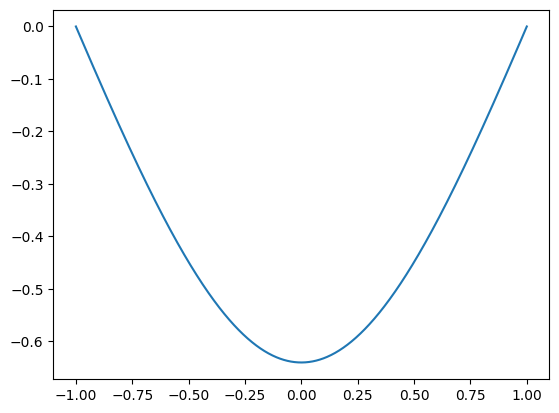

In [ ]:
x, y = solvePoisson(f, 1000, ini=-1.0, fin=1.0, ua=0, ub=0) #Llamamos a la función con las condiciones dadas por el problema
plt.plot(x, y)